In [145]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import random

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
import collections

#backend = BasicAer.get_backend('unitary_simulator')
backend = BasicAer.get_backend('qasm_simulator')

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()

## Classic Strategy for the CHSH Game
x,y are the values randomly sent by C (Charlie) to Alice and Bob. And a,b are the responses sent back to C by A and B. Game is won if x AND y is equal to a XOR b.

In [146]:
# x,y are the values randomly sent by C (Charlie) to Alice and Bob
# a,b are the responses sent back to C by A and B
def CHSHwin (x,y,a,b):
        fromC = (x and y)
        receivedfromC = (a ^ b)
        
        return  fromC == receivedfromC

In [147]:
# x,y are the values randomly sent by C (Charlie) to Alice and Bob
# a,b are the responses sent back to C by A and B
# Bob and Alice best classic strategy 75% success is to agree to send always the same
def AliceClassicStrategy (x):
      return  1

def BobClassicStrategy (y):
      return  1

In [158]:
N = 100000
success = 0
for i in range(N):
    x= random.randint(0,1)
    y= random.randint(0,1)
    result = CHSHwin(x,y,AliceClassicStrategy(x),BobClassicStrategy(y))
    if result == True:
        success += 1

print (100*success/N,"% Classic Success Rate")

75.073 % Classic Success Rate


## Classic Strategy Represented in Quantum Circuit

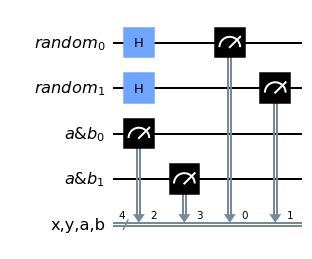

In [173]:
q = QuantumRegister(2, name="random")
c = ClassicalRegister(4, name="x,y,a,b")
ab = QuantumRegister(2, name="a&b")
#abclassic = ClassicalRegister(2, name="c.a&b")
#result = ClassicalRegister(1, name="result")

qc = QuantumCircuit(q, ab, c)

qc.h(q[0])
qc.h(q[1])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(ab[0],c[2])
qc.measure(ab[1],c[3])

qc.draw('mpl')


In [191]:
# Execute the job 
job = backend.run(transpile(qc, backend),shots=8000)
counts = job.result().get_counts(qc)
print (counts)

{'0011': 2017, '0001': 2033, '0000': 1974, '0010': 1976}


In [192]:
# Extract the results and see which ones is a win in CHCS Game
def QuantumSuccessMetric(counts):
    successes = collections.defaultdict(int)
    failures = collections.defaultdict(int)
    
    for key, value in counts.items():
        minisuccess = CHSHwin (int(key[3]),int(key[2]),int(key[1]),int(key[0]))
        if minisuccess == True:
            successes[key[0]] += value
        else:
            failures[key[0]] += value
    return successes, failures

sim_successes, sim_failures = QuantumSuccessMetric(counts)

# PRINT percentage of the results were successful
print (100*(sum(sim_successes.values()) / sum(counts.values())),"% Classic Success Rate")

74.7875 % Classic Success Rate


## Now Lets explore the Quantum Strategy for CHSH Game with entangled Pairs
Both Alice and Bob will share an entangled qubit pair


Alice strategy will be to Measure in computational basis if she receives 0 and measure in +,- basis if she receives 1. Then she will return measurements result (0 or 1)


Bob strategy will be to rotate by an angle +pi/8 or -pi/8 depending if he receives 0 or 1 in y. Then he will measure in computational basis and will return measurements result (0 or 1)

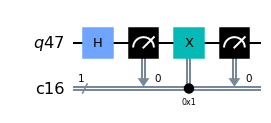

In [54]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c,1)
qc.measure(q,c)
qc.draw('mpl')



In [55]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}